Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv('EYAP_BAYI_SATIS.csv', encoding ='ISO-8859-9', sep=";", header=0)
df.head()

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN
0,anon_S0,120.05.183,OLC2018000000145,2018.01.12,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1150.56,1.0,A
1,anon_S2,120.12.TKV0246,AR52018000000146,2018.01.31,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,6240.00,5.0,A
2,anon_S0,120.15.510,EO12018000000545,2018.01.23,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1342.80,1.0,A
3,anon_S2,120.SB.ANT2294,AR82018000000016,2018.01.03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,2250.00,2.0,A
4,anon_S2,120.SB.LARA0088,AR82018000000006,2018.01.03,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,1230.00,1.0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30449 entries, 0 to 30448
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Yetkili Satıcı Kod  30449 non-null  object 
 1   Müşteri Kod         30449 non-null  object 
 2   MatbuNo             30449 non-null  object 
 3   FaturaTarihi        30449 non-null  object 
 4   Hiyerarşi 1         30449 non-null  object 
 5   Hiyerarşi 2         30449 non-null  object 
 6   Hiyerarşi 3         30449 non-null  object 
 7   Net Fiyat_Sum       30449 non-null  float64
 8   Adet_Sum            30449 non-null  float64
 9   URUN                30449 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.3+ MB


In [ ]:
df['FaturaTarihi'] = pd.to_datetime(df['FaturaTarihi'])

In [ ]:
df['Weekday'] = df['FaturaTarihi'].dt.day_name()

In [ ]:
df['MonthName'] = df['FaturaTarihi'].dt.month_name()

In [ ]:
df["year"] = df['FaturaTarihi'].map(lambda x: x.year)

iade edilen ürünler için bir data frame oluşturacağım.

In [ ]:
iade_urunler = df[df['Net Fiyat_Sum']<0]

In [ ]:
iade_urunler.corr()

,Net Fiyat_Sum,Adet_Sum,year
Net Fiyat_Sum,1.000000,0.620105,-0.147755
Adet_Sum,0.620105,1.000000,-0.057482
year,-0.147755,-0.057482,1.000000


In [ ]:
iade_urunler.head()

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
33,anon_S2,120.SB.LARA0009,024465,2018-01-25,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-2432.94,-1.0,A,Thursday,January,2018
118,anon_S0,120.15.510,391616,2018-01-16,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-532.80,-1.0,A,Tuesday,January,2018
156,anon_S0,120.13.922,003969,2018-01-19,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-1152.00,-1.0,A,Friday,January,2018
228,anon_S0,120.15.510,391616,2018-01-16,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-1695.60,-1.0,A,Tuesday,January,2018
252,anon_S1,120.01.I1746,151028,2018-01-22,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-2556.00,-3.0,A,Monday,January,2018


In [ ]:
iade_urunler.describe().T

,count,mean,std,min,25%,50%,75%,max
Net Fiyat_Sum,1290.0,-3040.911176,4079.693636,-65408.4,-3750.0,-1866.15,-884.19,-6.0
Adet_Sum,1290.0,-1.501550,1.969216,-32.0,-1.0,-1.00,-1.00,-1.0
year,1290.0,2019.115504,0.824278,2018.0,2018.0,2019.00,2020.00,2020.0


In [ ]:
iade_urunler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 33 to 30425
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Yetkili Satıcı Kod  1290 non-null   object        
 1   Müşteri Kod         1290 non-null   object        
 2   MatbuNo             1290 non-null   object        
 3   FaturaTarihi        1290 non-null   datetime64[ns]
 4   Hiyerarşi 1         1290 non-null   object        
 5   Hiyerarşi 2         1290 non-null   object        
 6   Hiyerarşi 3         1290 non-null   object        
 7   Net Fiyat_Sum       1290 non-null   float64       
 8   Adet_Sum            1290 non-null   float64       
 9   URUN                1290 non-null   object        
 10  Weekday             1290 non-null   object        
 11  MonthName           1290 non-null   object        
 12  year                1290 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), ob

* iade edilen 1290 ürün var
* Hangi ürünlerden daha çok iade edildiğine bakalım.


In [ ]:
iade_ürünler

,Yetkili Satıcı Kod,Müşteri Kod,MatbuNo,FaturaTarihi,Hiyerarşi 1,Hiyerarşi 2,Hiyerarşi 3,Net Fiyat_Sum,Adet_Sum,URUN,Weekday,MonthName,year
33,anon_S2,120.SB.LARA0009,024465,2018-01-25,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-2432.940,-1.0,A,Thursday,January,2018
118,anon_S0,120.15.510,391616,2018-01-16,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-532.800,-1.0,A,Tuesday,January,2018
156,anon_S0,120.13.922,003969,2018-01-19,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-1152.000,-1.0,A,Friday,January,2018
228,anon_S0,120.15.510,391616,2018-01-16,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-1695.600,-1.0,A,Tuesday,January,2018
252,anon_S1,120.01.I1746,151028,2018-01-22,"Armatür, Aksesuar & Gömme Reze",Armatürler,Armatür,-2556.000,-3.0,A,Monday,January,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30319,anon_S2,120.SB.ANT3727,I025259,2020-11-20,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-8976.000,-1.0,B,Friday,November,2020
30364,anon_S0,120.19.659,GIB2020000000020,2020-11-26,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-7818.000,-1.0,B,Thursday,November,2020
30381,anon_S1,120.01.A5692,151892,2020-11-02,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-5052.600,-1.0,B,Monday,November,2020
30417,anon_S0,120.22.557,000746.,2020-11-20,SSG & Tamamlayıcılar,Seramik Sağlık Gereçleri,Büyük Parçalar,-4445.532,-6.0,B,Friday,November,2020


In [ ]:
from os import mkdir

try:
  mkdir('Plots')
except:
  pass

  mypath='Plots'


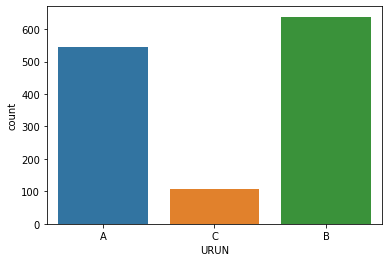

In [ ]:
sns.countplot(x="URUN", data=iade_urunler)
plt.savefig('Plots/countplot-iade edilen urunler.png')

En fazla B ürünü en az C ürünü iade edilmiş.

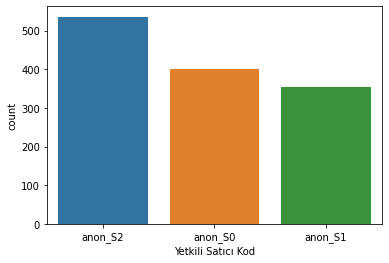

In [ ]:
sns.countplot(x="Yetkili Satıcı Kod", data=iade_ürünler)
plt.savefig('Plots/countplot-iade edilen urunleri yetkili saticilara göre siralaması.png')

En fazla anon_S2 'den en az anon_S1'den iade edilmiş

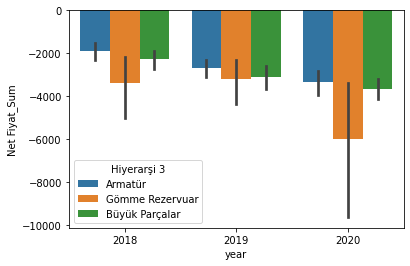

In [ ]:
sns.barplot(x="year", y="Net Fiyat_Sum", hue="Hiyerarşi 3", data=iade_ürünler)
plt.savefig('Plots/bar_plot- İade edilen urunlerde yillara gore degisen urunlerin gosterimi.png')

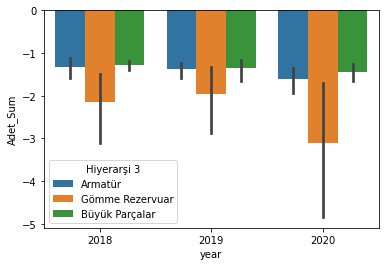

In [ ]:
sns.barplot(x="year", y="Adet_Sum", hue="Hiyerarşi 3", data=iade_ürünler) 

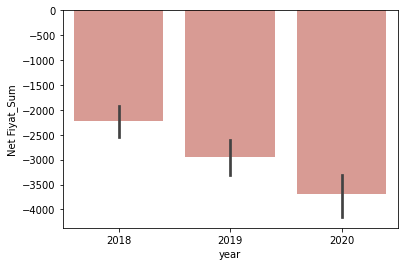

In [ ]:
sns.barplot(x="year", y="Net Fiyat_Sum", data=iade_ürünler,
                 color="salmon", saturation=.5)
plt.savefig('Plots/bar_plot- İade edilen ürünlerin yıllara göre tutarı.png')

en fazla iade edilen ürün tutarı 2020 yılında elde edilmiş.

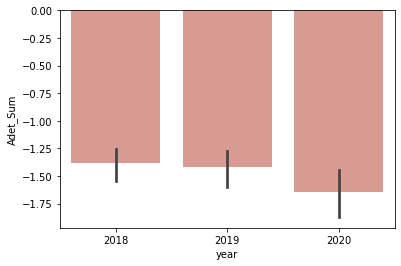

In [ ]:
sns.barplot(x="year", y="Adet_Sum", data=iade_ürünler,
                 color="salmon", saturation=.5)
plt.savefig('Plots/bar_plot- İade edilen ürün adetlerinin yıllara göre tutarı.png')

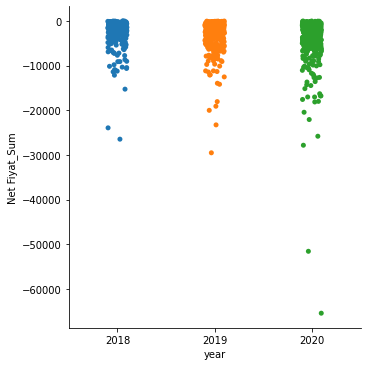

In [ ]:
sns.catplot(x="year", y="Net Fiyat_Sum", data=iade_ürünler)

In [ ]:
from os import mkdir

try:
  mkdir('Plots')
except:
  pass

  mypath='Plots'



In [ ]:
import os 
from os import listdir, mkdir

In [ ]:
all_files=os.listdir('Plots')
reports = [f'Plots/{file}' for file in all_files]

In [ ]:
print(reports)

['Plots/countplot-iade edilen ürünlerin yetkili satıcılara göre sıralaması.png', 'Plots/bar_plot- İade edilen ürünlerin yıllara göre tutarı.png', 'Plots/countplot-iade edilen ürünler.png', 'Plots/bar_plot- İade edilen ürünlerde yıllara göre değişen ürünlerin gösterimi.png', 'Plots/bar_plot- İade edilen ürün adetlerinin yıllara göre tutarı.png']


In [ ]:
!pip install FPDF

In [ ]:
from fpdf import FPDF

In [ ]:
WIDTH=210
HEIGHT=297

In [ ]:
pdf= FPDF()
pdf.set_font('Arial', 'B', 56)
pdf.add_page()

pdf.cell(190, 20, txt='REPORT', align='C')

for report in reports:
  pdf.add_page()
  pdf.set_font('Arial', 'B', 24)
  pdf.cell(190, 20, txt=report, align='C')

  pdf.image(report, 5, 30, WIDTH-5)
